In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
plt.rcParams.update(bundles.neurips2024())

In [153]:
name_match = {
    "fno": "FNO",
    "tfno": "TFNO",
    "unet_classic": "U-net",
    "unet_convnext": "CNextU-net"
}
def format_name(name):
    name = name.split("-")[1]
    return name_match[name]

# Pattern Formation

In [154]:
low_freq_df = pd.read_csv("bin0.csv")
med_freq_df = pd.read_csv("bin1.csv")
high_freq_df = pd.read_csv("bin2.csv")
low_freq_df.name = low_freq_df.name.apply(format_name)
med_freq_df.name = med_freq_df.name.apply(format_name)
high_freq_df.name = high_freq_df.name.apply(format_name)

low_freq_df.head()

,_defaultColorIndex,id,loss,name,time_step
0,1,r8dg7ji6,3.449236e-07,CNextU-net,0
1,1,r8dg7ji6,1.121100e-06,CNextU-net,1
2,1,r8dg7ji6,3.983792e-06,CNextU-net,2
3,1,r8dg7ji6,1.277243e-05,CNextU-net,3
4,1,r8dg7ji6,2.370940e-05,CNextU-net,4


In [155]:
losses = pd.DataFrame({'$$\\rho$$': [.11111, .1254, .1579, .1541],
                            '$$V_x$$': [.3976, .5592, .7677, .5526],
                            '$$V_y$$': [.7672, 1.633, 2.166, 1.022],
                            '$$P$$': [2.164, 4.846, 5.848, 2.89],
                            "Model": ["CNextU-net", "U-net", "TFNO", "FNO"]})

In [156]:
losses_t = losses.T
losses_t.columns = losses_t.iloc[-1]
losses_t = losses_t.iloc[:-1]
losses_t = losses_t.reset_index()

losses_t = losses_t.loc[:, ['index', 'CNextU-net', 'FNO', 'TFNO', 'U-net']]
losses_t = losses_t.rename(columns={"index": "Field VRMSE"})

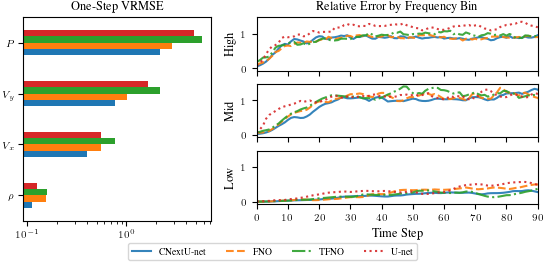

In [157]:
# fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True)
# fig, axes = plt.subplot_mosaic([["Error", "f"]],
#                                width_ratios=[1, 2])
linestyles = ["-", "--", "-.", ":"]
with plt.rc_context(bundles.neurips2024(nrows=4, ncols=5)):

    fig = plt.figure(layout="constrained")
    subfigs = fig.subfigures(1, 2, wspace=0.02, width_ratios=[1, 1.5])

    metric_ax = subfigs[0].subplots()
    losses_t.plot.barh(x="Field VRMSE", logx=True, ax=metric_ax, legend=False)
    metric_ax.set_ylabel("")
    metric_ax.set_title("One-Step VRMSE")
    axes = subfigs[1].subplots(3, 1, sharey=True, sharex=True)

    # sub_axes = axes.spl
    major_index = 0
    # handles = []
    for ax, df, freq in zip(axes, [low_freq_df, med_freq_df, high_freq_df][::-1], ["Low", "Mid", "High"][::-1]):
        if major_index == 0:
            ax.set_title("Relative Error by Frequency Bin")
        major_index += 1
        i = 0
        for model_name in sorted(name_match.values()):
            data = df.loc[df.name == model_name, ["time_step", "loss"]]
            handle, = ax.plot(data.time_step.values, 
                    np.sqrt(data.loss.values), 
                    label=model_name, alpha=.9,
                    linestyle=linestyles[i])
            # 
            ax.set_ylabel(freq)
            ax.set_xlim(0, 90)
            i += 1
    else:
        # ax.legend(labels=sorted(name_match.values()))
        # ax.set_ylim([0, 1.5])
        ax.set_xlabel("Time Step")
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="outside lower center", ncol=4,
            #    bbox_to_anchor=(.4, -.1)
            )

    # subfigs[0].suptitle("One-Step VRMSE")
    # subfigs[1].suptitle("Normalized Spectral Error by Scale")
    # axes[0].set_ylabel("Normalized Binned Spectral Error")
    # # fig.legend(labels=sorted(name_match.values()))
    fig.savefig("TRL2D.pdf")
    # plt.show()

# MHD

In [36]:
low_freq_df = pd.read_csv("mhd_spectral_bin_0.csv")
med_freq_df = pd.read_csv("mhd_spectral_bin_1.csv")
high_freq_df = pd.read_csv("mhd_spectral_bin_2.csv")
low_freq_df.name = low_freq_df.name.apply(format_name)
med_freq_df.name = med_freq_df.name.apply(format_name)
high_freq_df.name = high_freq_df.name.apply(format_name)

low_freq_df.head()

,_defaultColorIndex,id,loss,name,time_step
0,2,odglqk9s,0.003699,UConvNext,0
1,2,odglqk9s,0.034810,UConvNext,1
2,2,odglqk9s,0.128313,UConvNext,2
3,2,odglqk9s,0.307808,UConvNext,3
4,2,odglqk9s,0.585359,UConvNext,4


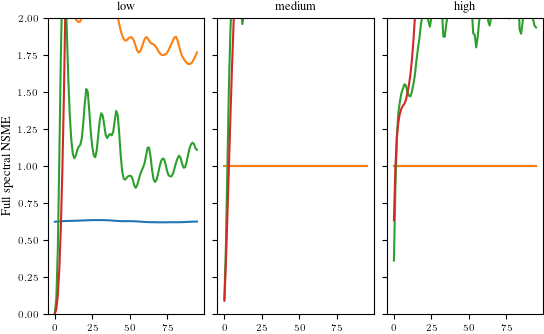

In [42]:
fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True)
for ax, df, freq in zip(axes, [low_freq_df, med_freq_df, high_freq_df], ["low", "medium", "high"]):
    for model_name in sorted(name_match.values()):
        data = df.loc[df.name == model_name, ["time_step", "loss"]]
        ax.plot(data.time_step.values, data.loss.values, label=model_name)
        ax.set_title(freq)
ax.set_ylim([0, 2])
axes[0].set_ylabel("Full spectral NSME")
# fig.legend(labels=sorted(name_match.values()))
fig.savefig("mhd.png")
plt.show()